# Билет 401

1) []
2) []
3) [x]
4) [x]
5) []
6) []

In [213]:
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path
import pandas as pd

df_dir = Path(r"D:\Университет\Второй курс\TVMS\Сессия1\Папка\PM23_4\DataSets")

---
## № 1
- Сформулируйте определение выборочной функции распределения и докажите ее сходимость по
вероятности к теоретической функции распределения.
- Выведите формулы для математического ожидания и
дисперсии выборочной функции распределния.

---
## № 2
По двум независимым выборкам $X_1, X_2,\dots,X_n$ объема $n$ из $N(\mu_X;\sigma_X^2)$ и $Y_1, Y_2,\dots,X_m$ объема $m$ из $N(\mu_Y;\sigma_Y^2)$
c неизвестными, но равными дисперсиями $\sigma_X^2 = \sigma_Y^2 = \sigma^2$, проверяется на уровне значимости $\alpha$
основная гипотеза $H_0:\mu_X = \mu_Y$ против альтернативной гипотезы $H_0:\mu_X \ne \mu_Y$.

1) Приведите необходимую статистику $\mathbb{F}$ - критерия однофакторного дисперсионного анализа и критическое множество для проверки $H_0$ против $H_1$.

2) Приведите (с выводом и необходимыми пояснениями в обозначениях) обоснование равенства процентных точек $f_\alpha(1;n+m-2)$ распределения Фишера и $t^2_{\frac{\alpha}{2}}(n+m-2)$ распределения Стьюдента с $n + m - 2$ свободы.

---
## № 3
Число $\pi$ до 30 знака после запятой имеет вид: 3.141592653589793238462643383279

Число $e$ до 30 знака после запятой имеет вид: 2.718281828459045235360287471352

- Используя критерий однородности $X^2$, проверьте на уровне значимости $\alpha = 0.05$ гипотезу $H_0$ о том, что последовательности цифр после запятой для
обоих чисел принадлежат одной генеральной совокупности
- Найдите $P$-значение критерия

In [15]:
from scipy.stats import chisquare, chi2

In [82]:
pi_ = "3.141592653589793238462643383279".split(".")[-1]
e_ = "2.718281828459045235360287471352".split(".")[-1]

# Частоты распределений
observed_pi = [pi_.count(str(i)) for i in range(10)]
expected_e = [e_.count(str(i)) for i in range(10)]


In [83]:
# Применение критерия хи-квадрат
chi2_statistic, p_value = chisquare(observed_pi, f_exp=expected_e)

# Вывод результатов
print("Статистика хи-квадрат:", chi2_statistic)
print("P-значение:", p_value)


Статистика хи-квадрат: 19.916666666666668
P-значение: 0.018433706772751614


In [84]:
# Ручной подсчет chi2

chi2_statistic = 0
# 10 разных цифр
for j in range(10):
    O = observed_pi[j]
    E = expected_e[j]
    
    chi2_statistic += (O - E) ** 2 / E

# 10 цифр -> 9 степеней свободы

p_value = 1 - chi2.cdf(chi2_statistic, 9)
print("Статистика хи-квадрат:", chi2_statistic)
print("P-значение:", p_value)


Статистика хи-квадрат: 19.916666666666668
P-значение: 0.01843370677275158


- $O_j$ - частота j в 1-й группе
- $E_j$ - частота j во 2-й группе

$statistic = \sum\limits_{j=0}^{10}\dfrac{(O_j-E_j)^2}{E_j}$

---
## № 4
В группе $\Omega$ учатся 26 студентов, $\Omega = \{1, 2,\dots, 26\}$

Пусть $X(i)$ - 100-балльная оценка студента $i \in \Omega$.

Из группы $\Omega$ случайным образом 9 раз выбирается студент $\omega \in \Omega$.\
Повторный выбор допускается.

Пусть $\omega_j$ - студент, полученный после выбора $j = 1,\dots,9$, $X(\omega_j)$ - его оценка. 

Среднюю оценку на случайной выборке обозначим $\bar X = \dfrac{1}{9}\sum X(\omega_j)$.

Оценки в группе даны: 70, 62, 0, 73, 90, 91, 53, 0, 68, 70, 76, 60, 89, 72, 89, 82, 76, 100, 54, 0, 38, 77, 55, 98, 0, 83. 

Требуется найти: 

1) Дисперсию $Var(\bar X)$
2) Центральный момент $\mu_3(\bar X)$

In [89]:
import numpy as np
def moment(X, k=1):
    return np.mean((X - np.mean(X))**k)

In [98]:
scores = [70, 62, 0, 73, 90, 91, 53, 0, 68, 70, 76, 60, 89, 72, 89, 82, 76, 100, 54, 0, 38, 77, 55, 98, 0, 83]

In [94]:
# Делим на размер выборки
var = np.var(scores)/9
var

101.74556213017752

In [99]:
# Делим на размер выборки **2
moment(scores, 3)/9**2

-375.2430587164315

---
## № 5
Пусть $\overrightarrow{x} = (x_1, \dots, x_{45})$ - реализация случайной выборки $\overrightarrow{X} = (X_1, \dots, X_{45})$ из нормального распределения $N(1.62; \sigma^2)$.

Проверяется на уровне значимости $\alpha = 0.02$ гипотеза $H_0:\sigma = 1.11$ против альтернативной гипотезы $H_1:\sigma \ne 1.11$ с критическим множеством вида $K_\alpha = (0;A) \cup (B;+\infty)$

1) Найдите значение статистики критерия $X_0^2$ 
2) Найдите границы А и В критического множества и проверьте гипотезу $H_0$
3) Найдите $P$-значение критерия
4) Найдите вероятность ошибки второго рода $\beta$ для $\sigma_1 = 1.21$

Исходные данные: 
$$\overrightarrow{x} = 
(4.592, 1.501, 2.534, 0.126, 1.182, 2.718, 0.549, 0.605, 1.348,\\
2.048, 1.049, 2.698, 1.675, -0.421, 1.969, 0.604, 4.144, -0.18,\\
2.663, 0.087, 0.38, 1.54, 0.934, -0.151, 0.664, 3.639, -0.42,\\
1.865, 2.941, 0.958, 1.73, 2.504, 2.289, 0.514, 1.108, 3.794,\\
0.461, -1.722, -1.461, 0.952, 2.531,2.889, -0.958, 3.428, 2.215)$$

In [211]:
# Значения из условия задачи
n = 45
sigma_0 = 1.11

# Предположим, что у нас есть значения выборки X (не предоставлены в задаче)
# В данном случае создадим случайную выборку для иллюстрации
import numpy as np
np.random.seed(42)  # для воспроизводимости результатов
X = np.random.normal(loc=1.62, scale=sigma_0, size=n)

# Вычисление выборочного среднего
sample_mean = np.mean(X)

# Вычисление исправленной выборочной дисперсии
sample_variance = np.sum((X - sample_mean)**2) / (n - 1)

# Вычисление статистики критерия
chi_squared_statistic = (n - 1) * sample_variance / sigma_0**2

sample_mean, sample_variance, chi_squared_statistic


(1.3799708214510304, 1.0662863405411012, 38.07856422677416)

In [194]:
def chi2_test(group1, group2, alpha=0.05):
    assert len(group1) == len(group2), 'Группы не равны'
    statistic = 0
    for O_, E_ in zip(group1, group2):
        statistic += (O_ - E_) ** 2 / E_
        
    p_value = 1 - chi2.cdf(statistic, len(group1)-1)
    return statistic, p_value

In [190]:
X = np.array(
    (
        4.592,
        1.501,
        2.534,
        0.126,
        1.182,
        2.718,
        0.549,
        0.605,
        1.348,
        2.048,
        1.049,
        2.698,
        1.675,
        -0.421,
        1.969,
        0.604,
        4.144,
        -0.18,
        2.663,
        0.087,
        0.38,
        1.54,
        0.934,
        -0.151,
        0.664,
        3.639,
        -0.42,
        1.865,
        2.941,
        0.958,
        1.73,
        2.504,
        2.289,
        0.514,
        1.108,
        3.794,
        0.461,
        -1.722,
        -1.461,
        0.952,
        2.531,
        2.889,
        -0.958,
        3.428,
        2.215,
    )
)


In [191]:
from math import ceil, floor
group_X = {i+0.5: sum((X < i))/len(X) for i in np.linspace(floor(min(X)), ceil(max(X)), 10)}

In [209]:
from scipy.stats import norm

n = len(X)
mean = 1.62
sigma = 1.11

dist = norm(loc=mean, scale=sigma**2)
observed = (np.array(list(group_X.values()))*10000).astype(int)
expected = (np.array([dist.cdf(i) for i in group_X])*10000).astype(int)

chi2_statistic, p_value = chi2_test(observed, expected)

print("Статистика хи-квадрат:", chi2_statistic)
print("P-значение:", p_value)

Статистика хи-квадрат: 739.183791855177
P-значение: 0.0


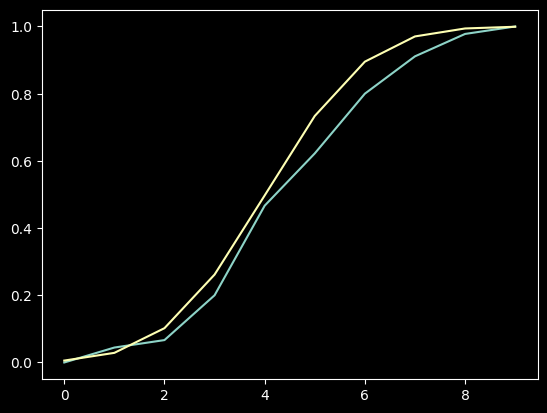

In [196]:
plt.plot(list(group_X.values()))
plt.plot([dist.cdf(i) for i in group_X])

In [108]:
from scipy.stats import chi2

# Заданные значения
alpha = 0.02
sigma_0 = 1.11


# Найдем критические значения хи-квадрат
# В ручную - по таблице
chi2_critical_lower = chi2.ppf(alpha / 2, df=n - 1)
chi2_critical_upper = chi2.ppf(1 - alpha / 2, df=n - 1)

# Выведем критические значения
chi2_critical_lower, chi2_critical_upper

(25.148025382824503, 68.7095129693454)

---
## № 6
По содержащейся в файле `ds6.4.9.csv` реализации случайной выборки из двумерного нормального
распределения 
$$N\left(\big(\mathbb{E}(X);\mathbb{E}(Y)\big);\begin{Vmatrix}Var(X) & Cov(X, Y)\\Cov(X, Y) & Var(Y)\end{Vmatrix}\right) = N\left((-3;1);\begin{Vmatrix}\sigma^{2} &\rho\sigma^2\\\rho\sigma^2 & \sigma^{2}\end{Vmatrix}\right)$$
с неизвестными параметрами $\rho\in (-1, 1)$ и $\sigma > 0$

1) Запишите логарифм функции правдоподобия, $\ln L(\rho, \sigma)$
2) Найдите оценки максимального правдоподобия $\hat \rho$ и $\hat \sigma$

In [223]:
df = pd.read_csv(df_dir / "ds6.4.9.csv", delimiter=';', names=('X','Y'), decimal=',')
df.sample(3)

,X,Y
3,-5.325100,3.595445
34,-3.108179,1.223342
32,-4.807182,1.584633


In [226]:
df.Y.mean()

1.3653078442094841

In [227]:
from scipy.stats import multivariate_normal

data = df

# Заданные параметры
mu = np.array([-3, 1])

# Функция для вычисления логарифма функции правдоподобия для каждой строки данных
def log_likelihood(row, rho, sigma):
    covariance_matrix = np.array([[sigma**2, rho*sigma**2], [rho*sigma**2, sigma**2]])
    mvn = multivariate_normal(mu, covariance_matrix)
    return mvn.logpdf(row)

# Заданные значения параметров (предположим)
rho_value = 0.5
sigma_value = 2.0

# Вычисление логарифма функции правдоподобия для каждой строки данных
data['log_likelihood'] = data.apply(lambda row: log_likelihood(row, rho_value, sigma_value), axis=1)

# Вычисление суммарного логарифма функции правдоподобия
total_log_likelihood = data['log_likelihood'].sum()

# Вывод результата
print(f"Логарифм функции правдоподобия: {total_log_likelihood}")


Логарифм функции правдоподобия: -146.8910487121241


In [236]:
from scipy.optimize import minimize

# Функция для минимизации (минус логарифма функции правдоподобия)
def neg_log_likelihood(params, data):
    rho, sigma = params
    covariance_matrix = np.array([[sigma**2, rho*sigma**2], [rho*sigma**2, sigma**2]])
    mvn = multivariate_normal(mu, covariance_matrix)
    return -mvn.logpdf(data).sum()

# Начальные значения для параметров
initial_params = [0.5, 2.0]  # Можете выбрать другие начальные значения

# Минимизация (максимизация отрицательного логарифма функции правдоподобия)
result = minimize(neg_log_likelihood, initial_params, args=(data[['X', 'Y']].values,), method='BFGS')


# Получение оценок максимального правдоподобия
rho_hat, sigma_hat = result.x

print(f"Оценка максимального правдоподобия для rho: {rho_hat}")
print(f"Оценка максимального правдоподобия для sigma: {sigma_hat}")


ValueError: The input matrix must be symmetric positive semidefinite.

In [238]:
from scipy.optimize import minimize

# Функция для минимизации (минус логарифма функции правдоподобия)
def neg_log_likelihood(params, data):
    rho, sigma = params
    covariance_matrix = np.array([[sigma**2, rho*sigma**2], [rho*sigma**2, sigma**2]])
    mvn = multivariate_normal(mu, covariance_matrix)
    return -mvn.logpdf(data).sum()

# Ограничения для параметров
constraints = ({'type': 'ineq', 'fun': lambda params: params[0] - (-1)},  # Ограничение на rho: rho > -1
               {'type': 'ineq', 'fun': lambda params: 1 - params[0]},       # Ограничение на rho: rho < 1
               {'type': 'ineq', 'fun': lambda params: params[1]})            # Ограничение на sigma: sigma > 0

# Начальные значения для параметров
initial_params = [0.0, 1.0]  # Можете выбрать другие начальные значения

# Минимизация с ограничениями
result = minimize(neg_log_likelihood, initial_params, args=(data[['X', 'Y']].values,), method='trust-constr', constraints=constraints)

# Получение оценок максимального правдоподобия
rho_hat, sigma_hat = result.x

print(f"Оценка максимального правдоподобия для rho: {rho_hat}")
print(f"Оценка максимального правдоподобия для sigma: {sigma_hat}")


c:\Programs\Python\Python312\Lib\site-packages\scipy\optimize\_hessian_update_strategy.py:182: UserWarning: delta_grad == 0.0. Check if the approximated function is linear. If the function is linear better results can be obtained by defining the Hessian as zero instead of using quasi-Newton approximations.
  warn('delta_grad == 0.0. Check if the approximated '


Оценка максимального правдоподобия для rho: -0.7277750836023325
Оценка максимального правдоподобия для sigma: 1.2284774245095706


In [235]:
neg_log_likelihood(initial_params, (data[['X', 'Y']].values))

146.8910487121241

---

По двум независимым выборкам  $X_1, X_2, . . . , X_n$ объема n из $N(µ_X; σ 2_X)$ и $Y_1, Y_2, . . . , Y_m$ объема m из $N(µ_Y ; σ^2_Y )$ c неизвестными, но равными дисперсиями $σ^2_X = σ^2_Y = σ^2$ , проверяется на уровне значимости α основная гипотеза $H_0 : µ_X = µ_Y$ против альтернативной гипотезы $H_1 : µ_X \neq µ_Y$ Приведите необходимую статистику F – критерия однофакторного дисперсионного анализа и критическое множество для проверки H0 против H1. 2) Приведите (с выводом и необходимыми пояснениями в обозначениях) обоснование равенства процентных точек fα(1; n + m − 2) распределения Фишера и t 2 α 2 (n + m − 2) распределения Стьюдента с n + m − 2 свободы.


1. При данных условиях F-критерий однофакторного дисперсионного анализа эквивалентен T-критерию для проверки $H_0$ против $H_1$ 
При $k=2; n_1=n; n_2=m$
 $F-отношение = \frac{SSTR/(k-1)}{ SSE / (n_1+n_2-k)} = \frac{SSTR}{ SSE / (n+m-2)}$
 $SSTR = n_1(\overline{X_1} - \overline{X})^2 + n_2(\overline{X_2} - \overline{X})^2 = n(\overline{X} - \dfrac {1} {n+m}(n\overline{X}+ m\overline{Y}))^2+m(\overline{Y} - \dfrac {1} {n+m}(n\overline{X}+ m\overline{Y}))^2 = n(\dfrac {m(\overline{X}-\overline{Y})}{n+m})^2+m(\dfrac {n(\overline{X}-\overline{Y})}{n+m})^2 = \dfrac{nm}{n+m}(\overline{X}-\overline{Y})^2$
 $SSE = (n_1-1)s_1^2 +(n_2-1)s_2^2=(n+m-2)s_p^2$, где 
 $s^2_p= \frac{(n-1)s^2_x + (m-1)s^2_y}{n+m-2}$
$=> F= \frac{(\bar{X} - \bar{Y})^2}{s^2_p (1/n + 1/m)} = T^2$ - T-статистика в квадрате.
$K_α^\prime = \{x_{ij} = (x_1, …, x_n, y_1, …, y_m):F > f_α(1; n+m-2) \}$
2.  Пусть Q=n+m-2
$P(F > f_α(1; n+m-2)) = P(\frac{χ^2(1) \cdot Q}{χ^2(Q)} > f_α(1; Q))=$
 = $P (\frac{Z^2}{\frac{1}{Q}Σ(Z^2_k)} > f_α(1; Q))$ =
 $=P(\frac{|Z|}{\sqrt{\frac{1}{Q}Σ(Z^2_k)}}) > \sqrt{f_α(1, Q)})=$
 
 = $P(-\sqrt{f_α(1, Q)} < \frac{Z}{\sqrt{\frac{1}{Q}Σ(Z^2_k)}}) < \sqrt{f_α(1, Q)})=$
 
 = $P( -\sqrt{f_α(1, Q)} < t \sim t(Q) < \sqrt{f_α(1, Q)}) =\alpha  ⇒ \text{в силу монотонности } F_t^{-1}(x),  
 \sqrt{f_α(1, Q)}= t_{\dfrac{\alpha}{2}}(Q)=> $
 
 $t_{α/2}(Q) ⇒ P(-t_{α/2}(Q) < t < t_{α/2}(Q)) = α$
$=> f_α (1; n+m-2) = t^2_{\dfrac{α}{2}} (n+m-2)$
